In [1]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg, DummyModel, RnnDlModel_test
from bitcoin_deep_learning.trainer import cv_train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
from bitcoin_deep_learning.metrics import *
api = ApiCall()

%load_ext autoreload
%autoreload 2


In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
model = RandomForestReg()
cv_train(model,train_df)
read_result().sort_values(by="date")

In [ ]:
"yolo"

In [ ]:
for n_estimators in [100,500,700,1000,1500,3000]:
    for warm_start in  [True,False]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                for min_samples_leaf in [1,5,10,20]:
                    model = RandomForestReg(warm_start=warm_start,
                                            n_estimators=n_estimators,
                                           bootstrap=bootstrap,
                                           criterion=criterion,
                                           min_samples_leaf=min_samples_leaf)

                    cv_train(model,train_df)

In [ ]:
X0 = [[i+5,-2*i]for i in range(1001)]
X1 = np.sin(np.arange(1001))

In [ ]:
df = pd.DataFrame(X0)
df["date"] = X1
df

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
past_reality[0]

In [ ]:
plt.plot(reality[0])

In [ ]:
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
df

In [ ]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df.drop(columns="date"),data=None)

In [ ]:
X_train, Y_train, X_test,Y_test = X_train_list[0], Y_train_list[0], X_test_list[0],Y_test_list[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#X_train_scaled =  scaler.fit_transform(X_train[:,-1,:])
#X_test_scaled = scaler.transform(X_test[:,-1,:])
X_train_scaled =  (X_train[:,-1,:])
X_test_scaled = (X_test[:,-1,:])
X_train_scaled

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)
plt.plot(Y_pred)
plt.plot(Y_test)

In [ ]:
Y_train

In [ ]:
X_train[:,-1,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[:,-1,:])

In [ ]:
X_train[:,-1,:]

In [ ]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
df = ApiCall().read_local()
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df,data=None)



In [ ]:
cross_val_trade(model,df)

In [ ]:
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
ct = 0
preds = []
computed_reality = []
for past_prices, diffs in zip(past_reality,prediction_diff):
    preds.append(past_prices * diffs+ past_prices)
preds  

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
#df  =scaler.fit_transform(df.drop(columns="date"))

In [ ]:
df[df.columns[1]].shape

In [ ]:
df

In [ ]:

df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
for i in range(10):
    plt.plot(prediction_diff[i],c="r")
    plt.plot(reality_diff[i])
    plt.show()


In [ ]:
df

In [ ]:
fold_score, score= train(model,df)
print(fold_score,score)

In [ ]:
for counter in range(20):
    alpha = 0.015 * random.random()
    l1 = random.random()*0.01
    # Instanciate model
    regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
    # Train and Fit data using the crossval
    val_score, score = train(regression_model,df);
    print(val_score,score)
    past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
    for i in range(len(reality)):
        plt.plot(prediction_diff[i],c="r")
        plt.plot(reality_diff[i])
        plt.show()

In [ ]:
from bitcoin_deep_learning.trainer import read_result
read_result().sort_values(by="date",ascending=False)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))-1):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(prediction_diff[i],c="r")
            plt.plot(reality_diff[i])
            plt.show()

In [ ]:
read_result().sort_values(by="date",ascending=False).head(50)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(reality[i])
            plt.plot()

In [ ]:
x = np.eye(260,3,31)
x.reshape(260,)

In [ ]:
read_result().sort_values(by="mean_score",ascending=False).head(50)

In [ ]:
from sklearn.metrics import mean_absolute_error
def train(model,
          df,
          save:bool=True,
          precision:int=5
          ):
    reality,prediction = cross_val(model,df)
    fold_score = [round(mean_absolute_error(Y_true,Y_pred),precision)
                            for Y_true,Y_pred in zip(reality,prediction)]
    score =round(np.mean(np.array(fold_score)),precision)
    # Option to save results
    if save == True :
        file_path = os.path.join(ROOT_DIR,
                                        "cross_val_data",
                                        'test.csv')
        # Check if file is there and create it otherwise
        if not os.path.isfile(file_path):
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
        # Append a new line with current CV results
        with open(file_path , 'a', newline='') as csvfile:
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S")})
            print("Training done")
        return fold_score, score


In [ ]:
train_df = ApiCall().read_local()

In [ ]:
read_result(file="CV_trader.csv")

In [ ]:

model = LinearRegressionBaselineModel()
train(model,train_df)

In [ ]:
ROOT_DIR = "/Users/Zalo/code/AlexandreLaizet/bitcoin_deep_learning"


In [ ]:
file_path = os.path.join(ROOT_DIR,
                        "cross_val_data",
                        'CV_trader.csv')
fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date',
             "roi_hodler", "sharpe_hodler", "roi_trader", "sharpe_trader","roi_whale", "sharpe_whale",
              "roi_hodler_whale",  "sharpe_hodler_whale", "roi_charles", 
                "sharpe_charles"]
pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
read_result(file="CV_trader.csv")

In [ ]:
from bitcoin_deep_learning.metrics import iterate_cross_val_results
iterate_cross_val_results()

In [ ]:
roi_hodler, roi_trader, roi_whale, roi_hodler_whale, roi_charles, sharpe_hodler, sharpe_trader, sharpe_whale, sharpe_hodler_whale, sharpe_charles = iterate_cross_val_results()


In [ ]:
with open(file_path , 'a', newline='') as csvfile:
            #fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S"),
                            "roi_hodler":roi_hodler
                            "sharpe_hodler": sharpe_hodler
                            "roi_trader": roi_trader
                            "sharpe_trader": sharpe_trader
                            "roi_whale": roi_whale
                            "sharpe_whale": sharpe_whale
                            "roi_hodler_whale": roi_hodler_whale
                            "sharpe_hodler_whale": sharpe_hodler_whale
                            "roi_charles": roi_charles
                            "sharpe_charles":sharpe_charles})
            print("Training done")

In [ ]:
train_df= ApiCall().read_local()

In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
for warm_start in  [True,False]:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                    for max_depht in [None,True]:
                        if max_depht :
                            max_depht = np.random.randint(1,1000)
                        print("oui")
                        min_samples_split = random.randint(2,100)
                        min_samples_leaf = random.randint(2,100)
                        model = RandomForestReg(warm_start=warm_start,
                                               max_features=max_features,
                                               bootstrap=bootstrap,
                                               criterion=criterion,
                                               max_depht=max_depht,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf)

                        cv_train(model,train_df)

# Dummy model

In [ ]:
model = DummyModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Linear Model

In [ ]:
model = LinearRegressionBaselineModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Random Forest

In [ ]:
model = RandomForestReg()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# RNN

In [ ]:
model = RnnDlModel_test(epochs=20, patience=5)
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

# Test last 3 months

In [2]:
from bitcoin_deep_learning.cross_val import cross_val_trade

In [ ]:
model = RnnDlModel_test(epochs=1, patience=1)
df = ApiCall().read_local(data="all")

plot_portolio_positions(model, df = df, cv=False,verbose=True)

/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.683e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


<Figure size 1000x600 with 0 Axes>

In [17]:
cv = False
past_realities, realities, realities_diff, prediction_diff = cross_val_trade(model, df=df, cv=cv, verbose=0)

17/17 [==============================] - 14s 220ms/step - loss: 0.0837 - mae: 0.0855 - val_loss: 0.0664 - val_mae: 0.0799


In [18]:
past_realities

[array([53765.79648309, 48962.92099327, 49174.90290806, 50492.43559639,
        50592.08849795, 50521.23639995, 47911.07640428, 47262.237443  ,
        49354.08716868, 50118.92095928, 46762.48252806, 48413.70564739,
        48819.84934723, 47695.2803949 , 46326.9195957 , 46962.91334059,
        46791.89605595, 46853.71063455, 48957.19391098, 48646.43337567,
        50770.61418965, 50864.32895235, 50649.92614866, 50806.44217533,
        50610.95680294, 47669.74037208, 46407.59548964, 47188.32055009,
        46328.94313809, 47620.42381093, 47344.84340974, 46467.61579525,
        45926.76178657, 43589.35568307, 43154.45522485, 41564.23901044,
        41744.05783199, 41910.51226779, 41820.01786922, 42721.69548372,
        43935.64398491, 42596.12337644, 43101.33599626, 43198.86986181,
        43122.78741443, 42235.1848487 , 42372.5532734 , 41731.94792084,
        40706.93154832, 36440.2657686 , 35036.9447362 , 36254.87985724,
        36656.19382217, 36946.23828322, 36851.36987997, 37148.32

In [19]:
portfolio_positions_hodler = []
portfolio_positions_trader = []
portfolio_positions_whale = []
portfolio_positions_hodler_whale = []
portfolio_positions_charles = []
preds_arr = []
for past_prices, diffs in zip(past_realities,prediction_diff):
    preds_arr.append(past_prices * diffs+ past_prices )


for reality, prediction in zip(realities, preds_arr):
    y_true, y_pred = reality, prediction

    portfolio_positions_hodler.append(play_hodler_strategy(y_true, y_pred))
    portfolio_positions_trader.append(play_trader_strategy(y_true, y_pred))
    portfolio_positions_whale.append(play_whale_strategy(y_true, y_pred))
    portfolio_positions_hodler_whale.append(play_hodler_whale_strategy(y_true, y_pred))
    portfolio_positions_charles.append(play_charles_strategy(y_true, y_pred))

return portfolio_positions_hodler, portfolio_positions_trader, portfolio_positions_whale, portfolio_positions_hodler_whale, portfolio_positions_charles


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

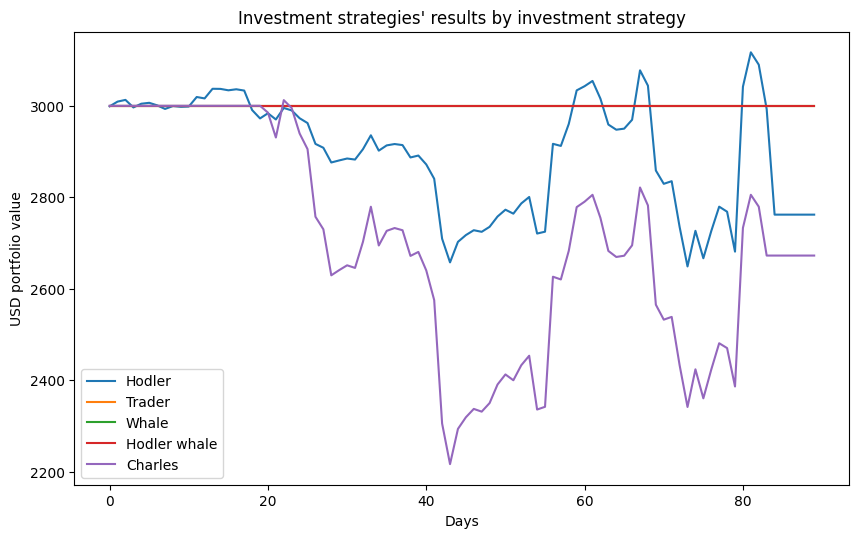

In [7]:
model = RandomForestReg()
df = ApiCall().read_local(data="all")
plot_portolio_positions(model=model, df = df, cv=False,verbose=True)

In [ ]:
model = LinearRegressionBaselineModel()
df = ApiCall().read_local(data="all")
Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
fig,axs = plt.subplots(2,1)
axs[0].plot(Y_test)

axs[0].plot(Y_pred, c= "r")
plt.show
#axs[1].plot(Y_true)
axs[1].plot(Y_true_past + Y_true_past* Y_pred, c= "r")
axs[1].plot(Y_true_past + Y_true_past* Y_test, c= "b")


In [ ]:
np.max(Y_pred)

In [ ]:
index = 89
print(Y_true_past[index],Y_pred[index],Y_true_past[index] + Y_true_past[index]* Y_pred[index])